In [2]:
from scipy import optimize
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)

In [3]:
a = np.random.random(4) 

a /= np.sqrt(np.sum(np.abs(a) ** 2))

num_qubits = 2
dev = qml.device('default.qubit', wires=num_qubits)

@qml.qnode(dev)
def circuit(params):
    qml.RY(params[0], wires=[0])
    qml.RY(params[1], wires=[1])
    qml.CNOT(wires=[0, 1])
    qml.RY(params[2], wires=[1])
    
    return qml.state()


In [7]:
def loss(a,prediction):
    total_loss = np.real(np.sum(np.array((a-prediction)**2)))
    return total_loss

# Define cost function
def cost(a,params):
    prediction = circuit(params)
    cost = loss(a,prediction)
    return cost

# Train the circuit

# Choose an optimizer and a step size
opt = qml.GradientDescentOptimizer(stepsize=0.1)

# Make an initial guess for the trainable parameters 
params = np.array([0.1, 0.1, 0.1],requires_grad=True)

# Iteration over a number of defined steps
y = []
for i in range(300):
    params_and_a,prev_cost = opt.step_and_cost(cost,a,params)
    print(params_and_a)
    params = params_and_a[1]
    y.append(prev_cost)

[tensor([0.56051681, 0.49137738, 0.39732714, 0.36916974], requires_grad=True), tensor([0.1422978 , 0.15653515, 0.15157063], requires_grad=True)]
[tensor([0.55889613, 0.50204686, 0.39736243, 0.37339164], requires_grad=True), tensor([0.18338436, 0.21122087, 0.19921083], requires_grad=True)]
[tensor([0.55674555, 0.51202014, 0.3974371 , 0.37748632], requires_grad=True), tensor([0.22323544, 0.26401801, 0.24296232], requires_grad=True)]
[tensor([0.5541685 , 0.52128036, 0.39756166, 0.38144989], requires_grad=True), tensor([0.26184783, 0.31491838, 0.28290441], requires_grad=True)]
[tensor([0.55126044, 0.52982761, 0.39774506, 0.3852806 ], requires_grad=True), tensor([0.2992355 , 0.36393944, 0.31914699], requires_grad=True)]
[tensor([0.54810714, 0.53767558, 0.39799476, 0.38897846], requires_grad=True), tensor([0.33542595, 0.41111918, 0.35182377], requires_grad=True)]
[tensor([0.54478378, 0.54484826, 0.3983168 , 0.3925448 ], requires_grad=True), tensor([0.37045677, 0.45651127, 0.38108623], requir

In [8]:
x =  [i for i in range(300)]

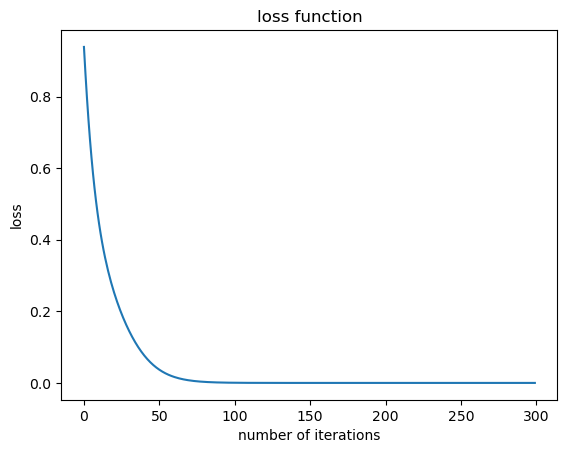

In [9]:
plt.plot(x, y)
plt.xlabel("number of iterations")
plt.ylabel("loss")
plt.title('loss function')
plt.show()